# SQL JOIN EXAMPLES
## Also showing how to access Postgres fom a Jupyter Notebook

In [84]:
import sqlalchemy
from config import db_password
from IPython.display import Image # For displaying the various JOIN venn diagram images
from config import db_password
import psycopg2

## Create a function to connect to the posgress server
### Cursors are used by database programmers to process individual rows returned by database system queries.
See https://en.wikipedia.org/wiki/Cursor_(databases)#:~:text=In%20computer%20science%2C%20a%20database,and%20removal%20of%20database%20records. for more details.

This example follows https://www.postgresqltutorial.com/postgresql-joins/

Great Postgres/Python reference: https://www.tutorialspoint.com/python_data_access/

In [85]:
# Connect to the Postgres server instance or a database.
# Returns a (connection, cursor) tuple
def connect(dbname='postgres'):
    #establishing the connection
    conn = psycopg2.connect(
        database=dbname, user="postgres", 
            password=db_password,
            host='127.0.0.1', port= '5432')
    conn.autocommit = True

    #Creating a cursor object using the cursor() method
    cursor = conn.cursor()
    return conn, cursor

## Create a function to close the connection to the database

In [3]:
# Close the connection to the Postgres server
def close_db(conn):
    conn.close()

## Now... Do Stuff

In [17]:
# Connect to the Postgres server instance
conn, cursor = connect()

In [19]:
# Create a new database called "joins_example"
cursor.execute('CREATE DATABASE joins_example')

DuplicateDatabase: database "joins_example" already exists


In [22]:
# Now connect to the new database
conn, cursor = connect('joins_example')

<connection object at 0x10c876310; dsn: 'user=postgres password=xxx dbname=joins_example host=127.0.0.1 port=5432', closed: 0>

In [27]:
# Create 2 tables in the new joins_example database
# Drop the table if it exists
cursor.execute('DROP TABLE IF EXISTS basket_a')

# Create the table
sql = 'CREATE TABLE basket_a ( \
    a INT PRIMARY KEY, \
    fruit_a VARCHAR (100) NOT NULL \
)'
cursor.execute(sql)

# Drop the table if it exists
cursor.execute('DROP TABLE IF EXISTS basket_b')

# Create the table
sql = 'CREATE TABLE basket_b ( \
    b INT PRIMARY KEY, \
    fruit_b VARCHAR (100) NOT NULL \
);'
cursor.execute(sql)

# Now we should have 2 new pables. Check it out in the pgAdmin window.

In [32]:
# Populate the new tables
cursor.execute('''DELETE FROM basket_a''') # Delete any data if it exists
sql = "INSERT INTO basket_a (a, fruit_a) \
    VALUES \
        (1, 'Apple'), \
        (2, 'Orange'), \
        (3, 'Banana'), \
        (4, 'Cucumber')"
cursor.execute(sql)

cursor.execute('''DELETE FROM basket_b''') # Delete any data if it exists
sql = "INSERT INTO basket_b (b, fruit_b) \
    VALUES \
        (1, 'Orange'), \
        (2, 'Apple'), \
        (3, 'Watermelon'), \
        (4, 'Pear')"
cursor.execute(sql)

In [36]:
# See if the data is actually in the tables

cursor.execute("SELECT * from basket_a")
result = cursor.fetchall();
print(result)

cursor.execute("SELECT * from basket_b")
result = cursor.fetchall();
print(result)

[(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
[(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]


In [46]:
# Turn the SELECT operation into a function
def select(sql_statement, prefix=None):
    cursor.execute(sql_statement)
    result = cursor.fetchall();
    if prefix is None:
        print(result)
    else:
        print(f"{prefix}: {result}")

In [48]:
# Print out the data in both tables
select('SELECT * from basket_a')
select('SELECT * from basket_b')

[(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
[(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]


In [49]:
# Create a function to print out both tables
def show_data():
    select('SELECT * from basket_a', "basket_a")
    select('SELECT * from basket_b', "basket_b")

In [50]:
# Try it out
show_data()

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]


# Inner Join

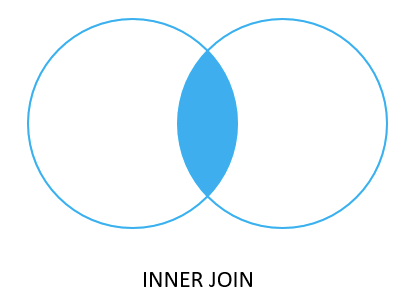

In [37]:
Image(filename='./Images/inner-join.png')

In [76]:
# Select with an inner join
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    INNER JOIN basket_b \
    ON fruit_a = fruit_b;'

show_data()
select(sql, "INNER JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
INNER JOIN: [(1, 'Apple', 2, 'Apple'), (2, 'Orange', 1, 'Orange')]


## LEFT JOIN

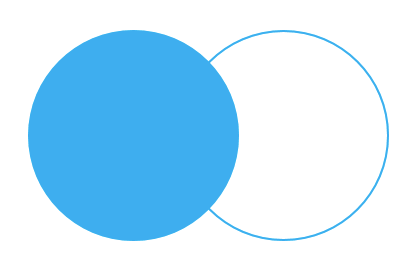

In [52]:
Image(filename='./Images/left-join.png')

In [77]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    LEFT JOIN basket_b \
    ON fruit_a = fruit_b'
show_data()
select(sql, "LEFT JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
LEFT JOIN: [(1, 'Apple', 2, 'Apple'), (2, 'Orange', 1, 'Orange'), (3, 'Banana', None, None), (4, 'Cucumber', None, None)]


## LEFT OUTER JOIN

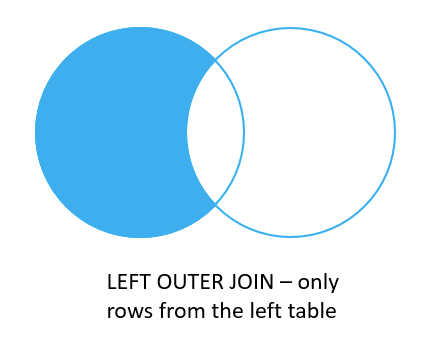

In [55]:
Image(filename='./Images/left-outer-join.png')

In [78]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    LEFT JOIN basket_b \
    ON fruit_a = fruit_b \
    WHERE b IS NULL;' # This makes in a Left outer join
show_data()
select(sql, "LEFT OUTER JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
LEFT OUTER JOIN: [(3, 'Banana', None, None), (4, 'Cucumber', None, None)]


## RIGHT JOIN

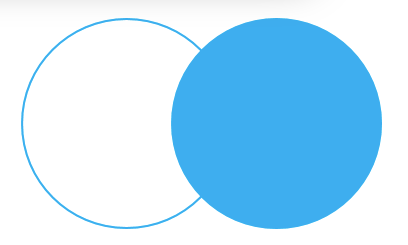

In [57]:
Image(filename='./Images/right-join.png')

In [79]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    RIGHT JOIN basket_b \
    ON fruit_a = fruit_b'
show_data()
select(sql, "RIGHT JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
RIGHT JOIN: [(2, 'Orange', 1, 'Orange'), (1, 'Apple', 2, 'Apple'), (None, None, 3, 'Watermelon'), (None, None, 4, 'Pear')]


## RIGHT OUTER JOIN

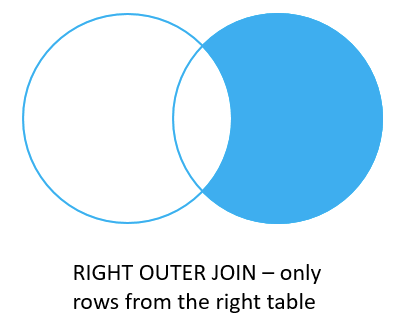

In [59]:
Image(filename='./Images/right-outer-join.png')

In [80]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    RIGHT JOIN basket_b \
    ON fruit_a = fruit_b \
    WHERE a IS NULL' # This makes it right outer
show_data()
select(sql, "RIGHT OUTER JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
RIGHT OUTER JOIN: [(None, None, 3, 'Watermelon'), (None, None, 4, 'Pear')]


# FULL JOIN

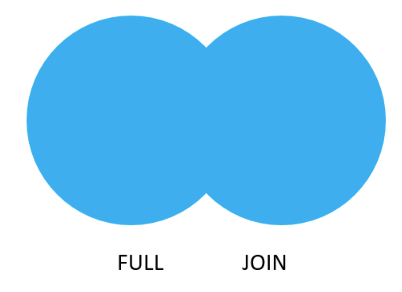

In [64]:
Image(filename='./Images/full-join.png')

In [81]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    FULL JOIN basket_b \
    ON fruit_a = fruit_b'
show_data()
select(sql, "FULL JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
FULL JOIN: [(1, 'Apple', 2, 'Apple'), (2, 'Orange', 1, 'Orange'), (3, 'Banana', None, None), (4, 'Cucumber', None, None), (None, None, 3, 'Watermelon'), (None, None, 4, 'Pear')]


# FULL OUTER JOIN

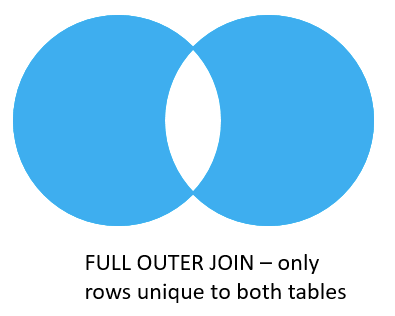

In [66]:
Image(filename='./Images/full-outer-join.png')

In [82]:
sql = 'SELECT a, fruit_a, b, fruit_b \
    FROM basket_a \
    FULL JOIN basket_b \
    ON fruit_a = fruit_b \
    WHERE a IS NULL OR b IS NULL'
show_data()
select(sql, "FULL OUTER JOIN")

basket_a: [(1, 'Apple'), (2, 'Orange'), (3, 'Banana'), (4, 'Cucumber')]
basket_b: [(1, 'Orange'), (2, 'Apple'), (3, 'Watermelon'), (4, 'Pear')]
FULL OUTER JOIN: [(3, 'Banana', None, None), (4, 'Cucumber', None, None), (None, None, 3, 'Watermelon'), (None, None, 4, 'Pear')]


# CLOSE THE DATABASE CONNECTION

In [83]:
close_db(conn)